## 순환신경망 : SimpleRNN

### 순환 신경망으로 IMDB 리뷰 분류하기

## IMDB 리뷰 데이터셋

### 텍스트  데이터 처리
- 텍스트 데이터 자체를 신경망에 전달할 수는 없음
    - 컴퓨터에서 처리하는 모든 것은 숫자 데이터 
    - 이미지는 그 자체가 픽셀값(수치)으로 표현되어 있어 변환이 필요 없음
    - 텍스트는 단어를 숫자로 변환 해야 함
    - 단어를 숫자로 바꾸는 간단한 방법은 
        - 단어마다 고유한 정수를 부여하는 방법        
        - 동일한 단어는 동일한 정수에 매핑되고 정수들은 어떠한 관계도 없음(물론, 크기 차이도 의미 없음)
        - 일반적으로 영어 문장은 모두 소문자로 바꾸고 구둣점 삭제 후 공백을 기준으로 분리
            - 이렇게 분리된 단어를 토큰이라고 함 
            - 샘플은 여러개의 단어로 이루어져 있고 1개의 토큰은 하나의 타임스탬프  
- 어휘 사전 : 훈련세트에서 고유한 단어를 뽑아만든 목록 

### IMDB 데이터 셋
- 텍스트의 전처리가 완료된 dataset
    - voca(어휘사전)도 완료되어 있음
- 텐서플로가 제공하는 데이터 셋은 이미 정수로 바꾼 데이터 셋이 포함되어 있음

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# (1) 
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=500)



In [4]:
train_data.shape
train_labels.shape 
test_data.shape
test_labels.shape

(25000,)

(25000,)

(25000,)

(25000,)

In [5]:
train_labels[:20]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1])

In [6]:
# (2) 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)


In [7]:
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(20000,)

(20000,)

(5000,)

(5000,)

In [8]:
X_train[:2]
# 리스트 1개가 리뷰 1개

array([list([1, 73, 89, 81, 25, 60, 2, 6, 20, 141, 17, 14, 31, 127, 12, 60, 28, 2, 2, 66, 45, 6, 20, 15, 497, 8, 79, 17, 491, 8, 112, 6, 2, 20, 17, 2, 2, 4, 436, 20, 9, 2, 6, 2, 7, 493, 2, 6, 185, 250, 24, 55, 2, 5, 23, 350, 7, 15, 82, 24, 15, 2, 66, 10, 10, 45, 2, 15, 4, 20, 2, 8, 30, 17, 2, 5, 2, 17, 2, 190, 4, 20, 9, 43, 32, 99, 2, 18, 15, 8, 157, 46, 17, 2, 4, 2, 5, 2, 9, 32, 2, 5, 2, 267, 17, 73, 17, 2, 36, 26, 400, 43, 2, 83, 4, 2, 247, 74, 83, 4, 250, 2, 82, 4, 96, 4, 250, 2, 8, 32, 4, 2, 9, 184, 2, 13, 384, 48, 14, 16, 147, 2, 59, 62, 69, 2, 12, 46, 50, 9, 53, 2, 74, 2, 11, 14, 31, 151, 10, 10, 4, 20, 9, 2, 364, 352, 5, 45, 6, 2, 2, 33, 269, 8, 2, 142, 2, 5, 2, 17, 73, 17, 204, 5, 2, 19, 55, 2, 2, 92, 66, 104, 14, 20, 93, 76, 2, 151, 33, 4, 58, 12, 188, 2, 151, 12, 215, 69, 224, 142, 73, 237, 6, 2, 7, 2, 2, 188, 2, 103, 14, 31, 10, 10, 451, 7, 2, 5, 2, 80, 91, 2, 30, 2, 34, 14, 20, 151, 50, 26, 131, 49, 2, 84, 46, 50, 37, 80, 79, 6, 2, 46, 7, 14, 20, 10, 10, 470, 158]),
       

In [9]:
# 리뷰 길이 확인
import numpy as np
length = np.array([len(x) for x in X_train])
length

array([259, 520, 290, ..., 300,  70,  77])

(array([1.1149e+04, 5.7490e+03, 1.8590e+03, 7.3200e+02, 3.0600e+02,
        1.8800e+02, 6.0000e+00, 4.0000e+00, 4.0000e+00, 3.0000e+00]),
 array([  11. ,  195.3,  379.6,  563.9,  748.2,  932.5, 1116.8, 1301.1,
        1485.4, 1669.7, 1854. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'length')

Text(0, 0.5, 'frequency')

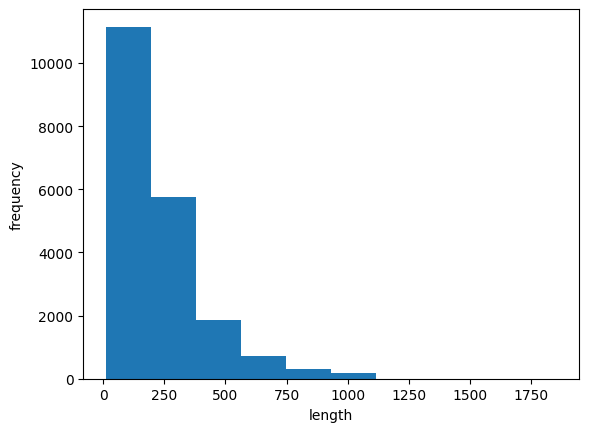

In [10]:
import matplotlib.pyplot as plt
plt.hist(length)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()


### 패딩 (Padding)
- 문장의 길이를 나타내는 배열의 크기를 동일하게 맞추는 작업  
- 패딩 방법  
  - np.zeros() 사용하여 0으로 채움
  - pad_sequences() 함수 사용  
        - Sequences로 이루어진 리스트를 넘파이 2d 배열로 바꿔주는 함수    
        -  pad_sequences(sequences, maxlen=None, dtype='int32', padding='pre',  
                         truncating='pre', value=0.0)  
        - sequences : 리스트  
        - maxlen : 길이(디폴트는 리스트 최대 길이)  
        - padding : 패딩 방식(전, 후)  
        - truncating : sequence가 최대길이보다 길 경우 전, 후 자름  
        - value : padding으로 넣어 주는 값. 디폴트는 0  

In [12]:
# pad_sequences() 함수 연습
from tensorflow.keras.preprocessing.sequence import pad_sequences

data = [[1,3,4,5],
        [2,6,7,4,3],
        [7,2,1,8,6,5,2,4]] # 최대 길이

pad_sequences(data, padding="pre")

array([[0, 0, 0, 0, 1, 3, 4, 5],
       [0, 0, 0, 2, 6, 7, 4, 3],
       [7, 2, 1, 8, 6, 5, 2, 4]], dtype=int32)

In [15]:
# (3) 
# 리뷰 단어가 100보다 작은것도 있으므로 패딩을 이용해 단어 갯수를 100으로 맞춤
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq= pad_sequences(X_train, maxlen =100, )
len(train_seq)

20000

In [16]:
train_seq[0]

array([ 10,   4,  20,   9,   2, 364, 352,   5,  45,   6,   2,   2,  33,
       269,   8,   2, 142,   2,   5,   2,  17,  73,  17, 204,   5,   2,
        19,  55,   2,   2,  92,  66, 104,  14,  20,  93,  76,   2, 151,
        33,   4,  58,  12, 188,   2, 151,  12, 215,  69, 224, 142,  73,
       237,   6,   2,   7,   2,   2, 188,   2, 103,  14,  31,  10,  10,
       451,   7,   2,   5,   2,  80,  91,   2,  30,   2,  34,  14,  20,
       151,  50,  26, 131,  49,   2,  84,  46,  50,  37,  80,  79,   6,
         2,  46,   7,  14,  20,  10,  10, 470, 158], dtype=int32)

In [17]:
train_seq[5]

array([  0,   0,   0,   0,   1,   2, 195,  19,  49,   2,   2, 190,   4,
         2, 352,   2, 183,  10,  10,  13,  82,  79,   4,   2,  36,  71,
       269,   8,   2,  25,  19,  49,   7,   4,   2,   2,   2,   2,   2,
        10,  10,  48,  25,  40,   2,  11,   2,   2,  40,   2,   2,   5,
         4,   2,   2,  95,  14, 238,  56, 129,   2,  10,  10,  21,   2,
        94, 364, 352,   2,   2,  11, 190,  24, 484,   2,   7,  94, 205,
       405,  10,  10,  87,   2,  34,  49,   2,   7,   2,   2,   2,   2,
         2, 290,   2,  46,  48,  64,  18,   4,   2], dtype=int32)

### 테스트 세트도 훈련세트와 동일하게 패딩 진행

In [18]:
# (4) 
test_seq = pad_sequences(X_test, maxlen=100)
test_seq.shape

(5000, 100)

### 원 핫 인코딩

In [19]:
# (5) 
from tensorflow.keras.utils import to_categorical

X_train_oh = to_categorical(train_seq)
X_test_oh = to_categorical(test_seq)



## 순환 신경망 만들기
- 케라스의 가장 간단한 순환 신경망 알고리즘
    - SimpleRNN(유닛수(출력),입력차원)
    - 입력차원 : 100->100개의 단어로 맞춤 500->500개의 빈도 높은 단어만 사용
        - 단어를 한줄로 입력하면 단어의 정수값(의미없는)이 큰 단어는 큰 출력을 만들어 내버림
        - 그런 이유로 단어마다 동일한 가중치를 갖도록  one-hot 인코딩 해야 함
            - 임베딩이 아닌 one-hot 인코딩 방식으로 먼저 진행

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding, SimpleRNN
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# (1) 모델 설정
model = Sequential()
model.add(SimpleRNN(8, input_shape=(100, 500)))
model.add(Dense(1, activation="sigmoid"))

# (2) 모델  컴파일 
model.compile(optimizer=RMSprop(learning_rate=1e-4), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

check_pointer = ModelCheckpoint('best-simplernn-model.keras')
early_stopping= EarlyStopping(patience=3,  restore_best_weights=True)

# 모델 학습
history = model.fit(X_train_oh, y_train, epochs=100, batch_size=64,
                    validation_data=(X_test_oh, y_test),
                    callbacks=[check_pointer, early_stopping])

C:\Users\82108\anaconda3\envs\DLenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.4961 - loss: 0.6993 - val_accuracy: 0.5040 - val_loss: 0.6962
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.5068 - loss: 0.6953 - val_accuracy: 0.5044 - val_loss: 0.6949
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.5170 - loss: 0.6937 - val_accuracy: 0.5110 - val_loss: 0.6937
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.5261 - loss: 0.6920 - val_accuracy: 0.5174 - val_loss: 0.6928
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.5343 - loss: 0.6903 - val_accuracy: 0.5244 - val_loss: 0.6921
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.5394 - loss: 0.6884 - val_accuracy: 0.5274 - val_loss: 0.6914
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.5432 - loss: 0.6887 - val_accuracy: 0.5312 - val_loss: 0.6909
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.5426 - loss: 0.6881 -

In [21]:
loss, accuracy = model.evaluate(X_test_oh, y_test)
print(f'정확도: {accuracy:.4f}, 손실: {loss:.4f}')

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5400 - loss: 0.6869 
정확도: 0.5428, 손실: 0.6884


In [22]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 8)                   │           4,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,164 (31.89 KB)

 Trainable params: 4,081 (15.94 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,083 (15.95 KB)

Text(0.5, 0, 'epoch')

Text(0, 0.5, 'loss')

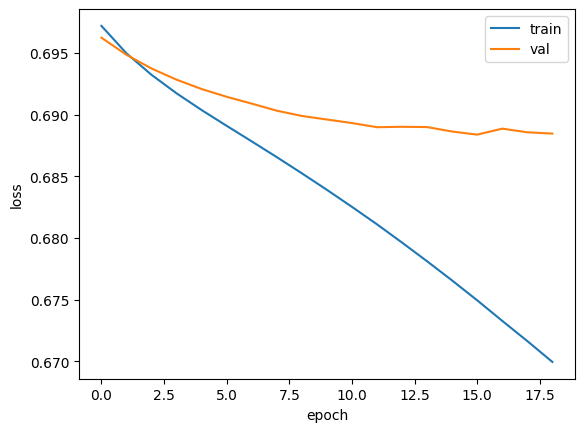

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 순환 신경망 훈련하기
- 훈련 방법은 다른 알고리즘과 동일

### 단어 임베딩

원-핫 인코딩의 문제
- 원-핫 인코딩을 그대로 사용하면 벡터 길이가 너무 길어진다는 단점
- 예로 1만 개의 단어 토큰으로 이루어진 말뭉치(Corpus)를 다룬다고 할 때
- 원-핫 인코딩을 적용하여 벡터화할 경우 
- 단어의 의미를 전혀 고려하지 않고
- 9,999개의 0과 하나의 1로 이루어진 벡터를 1만개 만들어야 함
- 공간적 낭비

말뭉치(Corpus)
- 자연어 연구를 위해 특정한 목적을 가지고 언어의 표본을 추출한 집합

밀집 표현(Dense Representation)
- 사용자가 설정한 값으로 모든 단어의 벡터 표현의 차원을 맞춤
- 이 과정에서 더 이상 0과 1만 가진 값이 아니라 실수값을 가지게 됨  
- 예:   
    강아지 = [0 0 0 1 ......0] # 10,000 차원  
    밀집 표현으로 변경  
    강아지 = [0.2 1.8 1.1 .... ] # 128차원  
    벡터의 차원이 조밀해졌다고 해서 밀집 벡터(dense bector)라고 함  

단어 임베딩 (word embedding)
- 공간적 낭비를 해결하기 위한 방법으로
- 단어의 의미를 고려하고 밀집 벡터(dense vector)의 형태로 표현
- 의미가 비슷한 단어는 비슷한 방향에 위치
- 단어의 의미를 효과적으로 표현하기 때문에 
- 원-핫 인코딩보다 학습 성능을 높일 수 있음
- 주어진 배열을 정해진 길이로 압축  

예 : 단어 happy는 bad 보다 good에 더 가깝고  
    cat은 good 보다는 dog에 가깝다는 것을 고려하여  
    배열을 새로운 수치로 변경 

    
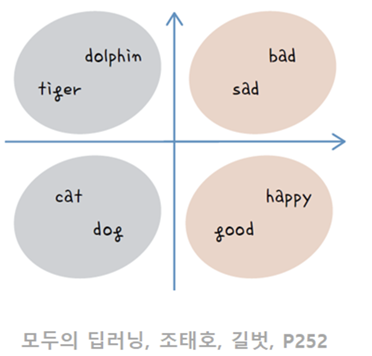

### 케라스의 Embeddong 클래스 사용  
- Embedding(총 단어수(단어 집합의 크기), 임베딩 후 출력되는 벡터 크기,input_length(각 입력 시퀀스 길이))  
- Embedding(16, 4, input_length=2)  


### 임베딩층  
- model = Sequential()  
- model.add(Embedding(word_size, 8, input_length=4))  

### 단어 → 단어에 부여된 고유한 정수값 → 임베딩 층 통과 → 밀집 벡터  

- 임베딩 층
    - 입력 정수에 대해 밀집 벡터(dense vector)로 맵핑하고 
    - 밀집 벡터는 인공 신경망의 학습 과정에서 가중치가 학습되는 것과 같은 방식으로 훈련
    - 훈련 과정에서 단어는 모델이 풀고자하는 작업에 맞는 값으로 업데이트 됨
    - 그리고 이 밀집 벡터를 임베딩 벡터라고 함  


### 패딩 (Padding) 
- 문장의 길이를 나타내는 배열의 크기를 동일하게 맞추는 작업
- 길이가 전부 동일한 문서들에 대하여 하나의 행렬로 인식하고
- 한꺼번에 묶어서 처리
- 각 문장(문서)의 길이가 서로 다른 경우 
- 동일한 길이로 맞추로 빈 부분은 0으로 채움

In [ ]:
# 패딩 연습

In [28]:
from tensorflow.keras.preprocessing.text import Tokenizer

sentences = ["지금은 딥러닝을 공부하고 있어요", "어렵지 않고 쉬워요", "참 재미있어요"]
tk = Tokenizer()
tk.fit_on_texts(sentences)
print(tk.word_index)

{'지금은': 1, '딥러닝을': 2, '공부하고': 3, '있어요': 4, '어렵지': 5, '않고': 6, '쉬워요': 7, '참': 8, '재미있어요': 9}


In [30]:
# 각 문장에 해당되는 인덱스를 배열로 출력
sent_seq = tk.texts_to_sequences(sentences)
sent_seq

[[1, 2, 3, 4], [5, 6, 7], [8, 9]]

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences



array([[1, 2, 3, 4],
       [0, 5, 6, 7],
       [0, 0, 8, 9]])

In [ ]:
# 길이를 6으로 지정


array([[0, 0, 1, 2, 3, 4],
       [0, 0, 0, 5, 6, 7],
       [0, 0, 0, 0, 8, 9]])

In [ ]:
# 뒷 부분을 0으로 채움 : padding='post'


array([[1, 2, 3, 4, 0, 0],
       [5, 6, 7, 0, 0, 0],
       [8, 9, 0, 0, 0, 0]])

### 임베딩 연습

In [ ]:
text = ["나는 밥을 먹었다.", "나는 학교에 갔다.", "오늘 학교에 선생님이 오셨다."]



word_index

{'나는': 1, '학교에': 2, '밥을': 3, '먹었다': 4, '갔다': 5, '오늘': 6, '선생님이': 7, '오셨다': 8}

In [ ]:
seq_x = 
seq_x # 토큰화 결과

[[1, 3, 4], [1, 2, 5], [6, 2, 7, 8]]

In [ ]:
# 패딩 : 단어수 4개인 가장 긴 문장에 맞춰 패딩 
padded_data = 
padded_data # 패딩 결과

array([[0, 1, 3, 4],
       [0, 1, 2, 5],
       [6, 2, 7, 8]])

In [38]:
# 총 단어수 확인
len(word_index)

8

In [39]:
padded_data.shape
# (3, 4) : 3개의 문장, 각 문장의 단어수는 4개 

(3, 4)

In [ ]:
# Embedding 층에서 사용할 단어 크기 설정 
word_size = 

In [115]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding

In [ ]:
# (1) 모델 설정 
model = Sequential()

# 8 : 출력되는 벡터의 크기 

# 컴파일 


In [ ]:

# 임베딩을 하게 되면 차원이 늘어남 
# (3, 4) -> (3, 4, 8) 

1/1 [==============================] - 0s 102ms/step


(3, 4, 8)

In [ ]:
# ["나는 밥을 먹었다.", "나는 학교에 갔다.", "오늘 학교에 선생님이 오셨다."]
# '나는' 이란 단어가 임베딩 층을 통해서 8개의 밀집 데이터로 재인코딩 된 것 

In [44]:
output_arry[0][1] # 첫 번째 문쟝의 1번 인덱스 단어 (나는)
output_arry[1][1] # 두 번째 문쟝의 1번 인덱스 단어 (나는) (동일)

array([-0.04153102,  0.01730397,  0.00955981, -0.01811513,  0.04990551,
        0.03381172, -0.0031838 ,  0.03161627], dtype=float32)

array([-0.04153102,  0.01730397,  0.00955981, -0.01811513,  0.04990551,
        0.03381172, -0.0031838 ,  0.03161627], dtype=float32)

In [46]:
output_arry[1][0]
output_arry[1][1]
output_arry[1][2]

array([-0.02326623,  0.02905594,  0.0280952 , -0.04607759, -0.00709562,
       -0.01888919,  0.00179567, -0.00599236], dtype=float32)

array([-0.04153102,  0.01730397,  0.00955981, -0.01811513,  0.04990551,
        0.03381172, -0.0031838 ,  0.03161627], dtype=float32)

array([-0.04871831, -0.04078235,  0.01268807,  0.03573116,  0.03823182,
       -0.0055717 ,  0.03043124,  0.01598438], dtype=float32)

In [47]:
output_arry[2][0]
output_arry[2][1]
output_arry[2][2]

array([ 0.03265129,  0.01734172, -0.04937495, -0.02984891, -0.01479252,
        0.02093153, -0.03101453,  0.03197888], dtype=float32)

array([-0.04871831, -0.04078235,  0.01268807,  0.03573116,  0.03823182,
       -0.0055717 ,  0.03043124,  0.01598438], dtype=float32)

array([ 0.0284973 ,  0.01012427,  0.03320564, -0.00647614,  0.03438976,
        0.04798377,  0.02304706,  0.01890958], dtype=float32)

In [ ]:
prediction = model.predict([0, 1, 2, 3, 4]) # 학교에 밥을 먹었다 갔다
prediction

1/1 [==============================] - 0s 89ms/step


array([[-0.02326623,  0.02905594,  0.0280952 , -0.04607759, -0.00709562,
        -0.01888919,  0.00179567, -0.00599236],
       [-0.04153102,  0.01730397,  0.00955981, -0.01811513,  0.04990551,
         0.03381172, -0.0031838 ,  0.03161627],
       [-0.04871831, -0.04078235,  0.01268807,  0.03573116,  0.03823182,
        -0.0055717 ,  0.03043124,  0.01598438],
       [-0.03325999, -0.00997691, -0.031503  ,  0.02309373, -0.02154143,
        -0.02022862,  0.04777403,  0.04572842],
       [ 0.00224453, -0.02912513, -0.04641084,  0.01964781,  0.01964308,
         0.01528068, -0.02242707,  0.0251998 ]], dtype=float32)

## 단어 임베딩 사용

In [31]:
model2 = Sequential()
model2.add(Embedding(500, 16, input_length=100))
model2.add(SimpleRNN(8))
model2.add(Dense(1, activation="sigmoid"))

C:\Users\82108\anaconda3\envs\DLenv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [32]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
model2.compile(optimizer=RMSprop(learning_rate=1e-4), loss='binary_crossentropy', 
               metrics=['accuracy'])

check_pointer = ModelCheckpoint('best-embedding-model.keras')
early_stopping = EarlyStopping(patience=2,  restore_best_weights=True)

history = model2.fit(train_seq, y_train, epochs=100, batch_size=64,
                     validation_data=(test_seq, y_test),
                      callbacks=[check_pointer, early_stopping])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5038 - loss: 0.6991 - val_accuracy: 0.5054 - val_loss: 0.6944
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5403 - loss: 0.6871 - val_accuracy: 0.5424 - val_loss: 0.6852
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5813 - loss: 0.6772 - val_accuracy: 0.5890 - val_loss: 0.6728
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6261 - loss: 0.6598 - val_accuracy: 0.6726 - val_loss: 0.6240
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7105 - loss: 0.5773 - val_accuracy: 0.7168 - val_loss: 0.5624
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7561 - loss: 0.5221 - val_accuracy: 0.7622 - val_loss: 0.5115
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7742 - loss: 0.4956 - val_accuracy: 0.7664 - val_loss: 0.5005
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7798 - loss: 0.4864 - 

Text(0.5, 0, 'epoch')

Text(0, 0.5, 'loss')

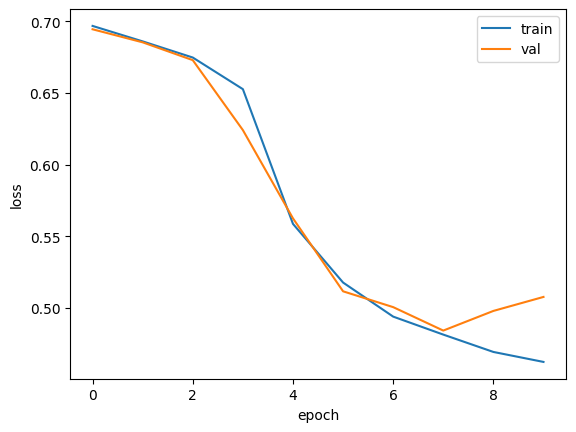

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

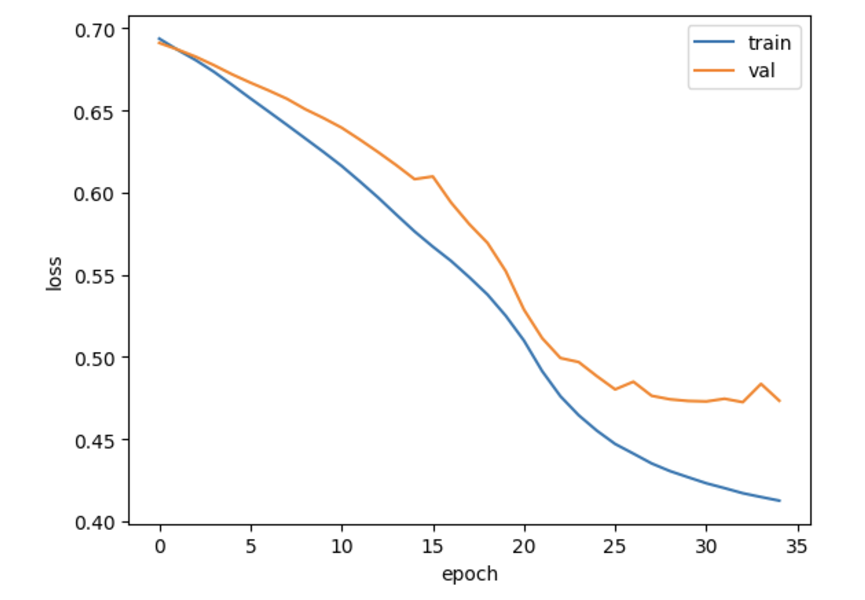